# LangGraph and LangSmith - Agentic RAG Powered by LangChain

In the following notebook we'll complete the following tasks:

- 🤝 Breakout Room #1:
  1. Install required libraries
  2. Set Environment Variables
  3. Creating our Tool Belt
  4. Creating Our State
  5. Creating and Compiling A Graph!
  
- 🤝 Breakout Room #2:
  - Part 1: LangSmith Evaluator:
    1. Creating an Evaluation Dataset
    2. Adding Evaluators
  - Part 2:
    3. Adding Helpfulness Check and "Loop" Limits
    4. LangGraph for the "Patterns" of GenAI

## Lessons Learned:

Based on the notebook and lecture content, here are three creative and insightful lessons learned:

1. **The Power of Graphical Thinking in AI Development:**

   - LangGraph's approach of translating flowcharts into functional code reveals a powerful paradigm shift in AI development.
   - This "visual-to-functional" methodology bridges the gap between conceptual design and implementation, potentially democratizing complex AI system development.
   - It suggests that future AI tools might evolve towards more visual, intuitive interfaces, allowing a broader range of professionals (not just programmers) to contribute to AI system design. This could lead to more diverse and innovative AI applications across various industries.

2. **The Renaissance of State Machines in Modern AI:**

   - The emphasis on state machines in LangGraph highlights a fascinating convergence of classical computer science concepts with cutting-edge AI. It demonstrates that as AI systems become more complex, we're circling back to fundamental computational ideas to manage this complexity.
   - This "back to basics" approach, combined with advanced language models, creates a powerful hybrid that balances the flexibility of AI with the reliability of traditional software engineering. It suggests that the future of AI might not be about abandoning established computer science principles, but rather about reimagining and repurposing them for the AI era.

3. **The Emergence of AI Introspection through Self-Evaluation:**

   - The implementation of the helpfulness check in the LangGraph system points to an intriguing development: AI systems that can critique and improve their own outputs.
   - This self-evaluation capability hints at a form of artificial introspection, where the AI doesn't just produce results but also assesses their quality. As this concept evolves, we might see AI systems that not only perform tasks but also explain their reasoning, acknowledge their limitations, and actively work to improve their performance.
   - This could lead to more transparent, trustworthy, and continuously improving AI systems, potentially addressing some of the current concerns about AI reliability and bias.

## What should we learn next?

1. **Multi-Agent Dynamics and Coordination:**

   While the session covered single-agent systems, the next frontier lies in understanding how multiple LangGraph agents can interact and coordinate. We should strive to learn:
   - How to design and implement multi-agent systems using LangGraph
   - Strategies for inter-agent communication and task delegation
   - Methods to resolve conflicts or contradictions between agents
   - Ways to evaluate the collective performance of a multi-agent system

2. **Long-Term Memory and Continuous Learning:**

   The current implementation focuses on short-term state management. A crucial next step would be to explore:
   - How to implement long-term memory in LangGraph agents
   - Techniques for continuous learning and model updating based on interaction history
   - Methods to balance between retaining useful information and avoiding outdated or irrelevant data
   - Evaluation metrics for assessing an agent's ability to learn and improve over time

3. **Robust and Comprehensive Evaluation Frameworks:**

   While the session introduced basic evaluation techniques, there's much more to explore in creating comprehensive evaluation frameworks. We should aim to learn:
   - How to design holistic evaluation metrics that go beyond simple keyword matching
   - Methods to assess not just the correctness of responses, but also their relevance, coherence, and ethical implications
   - Techniques for automated generation of diverse and challenging test cases
   - Ways to integrate human feedback effectively into the evaluation process
   - How to use LangSmith for more complex, multi-stage evaluations that mirror real-world use cases

# 🤝 Breakout Room #1

## Part 1: LangGraph - Building Cyclic Applications with LangChain

LangGraph is a tool that leverages LangChain Expression Language to build coordinated multi-actor and stateful applications that includes cyclic behaviour.

### Why Cycles?

In essence, we can think of a cycle in our graph as a more robust and customizable loop. It allows us to keep our application agent-forward while still giving the powerful functionality of traditional loops.

Due to the inclusion of cycles over loops, we can also compose rather complex flows through our graph in a much more readable and natural fashion. Effetively allowing us to recreate appliation flowcharts in code in an almost 1-to-1 fashion.

### Why LangGraph?

Beyond the agent-forward approach - we can easily compose and combine traditional "DAG" (directed acyclic graph) chains with powerful cyclic behaviour due to the tight integration with LCEL. This means it's a natural extension to LangChain's core offerings!

## Task 1:  Dependencies

We'll first install all our required libraries.

In [6]:
!pip install -qU langchain langchain_openai langchain-community langgraph arxiv duckduckgo_search==5.3.1b1

  DEPRECATION: sgmllib3k is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [48]:
%pip install -qU grandalf


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Task 2: Environment Variables

We'll want to set both our OpenAI API key and our LangSmith environment variables.

In [7]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [8]:
from uuid import uuid4

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"AIE3 - LangGraph - {uuid4().hex[0:8]}"
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")

## Task 3: Creating our Tool Belt

As is usually the case, we'll want to equip our agent with a toolbelt to help answer questions and add external knowledge.

There's a tonne of tools in the [LangChain Community Repo](https://github.com/langchain-ai/langchain/tree/master/libs/community/langchain_community/tools) but we'll stick to a couple just so we can observe the cyclic nature of LangGraph in action!

We'll leverage:

- [Duck Duck Go Web Search](https://github.com/langchain-ai/langchain/tree/master/libs/community/langchain_community/tools/ddg_search)
- [Arxiv](https://github.com/langchain-ai/langchain/tree/master/libs/community/langchain_community/tools/arxiv)

#### 🏗️ Activity #1:

Please add the tools to use into our toolbelt.

> NOTE: Each tool in our toolbelt should be a method.

In [4]:
!pip install -qU langchain_community


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [9]:
from langchain_community.tools.ddg_search import DuckDuckGoSearchRun
from langchain_community.tools.arxiv.tool import ArxivQueryRun

tool_belt = [
    DuckDuckGoSearchRun(), ArxivQueryRun()
]

### Actioning with Tools

Now that we've created our tool belt - we need to create a process that will let us leverage them when we need them.

We'll use the built-in [`ToolExecutor`](https://github.com/langchain-ai/langgraph/blob/fab950acfbf5fea46c9313dca34ee2ae01f1728b/libs/langgraph/langgraph/prebuilt/tool_executor.py#L50) to do so.

In [10]:
from langgraph.prebuilt import ToolExecutor

tool_executor = ToolExecutor(tool_belt)

### Model

Now we can set-up our model! We'll leverage the familiar OpenAI model suite for this example - but it's not *necessary* to use with LangGraph. LangGraph supports all models - though you might not find success with smaller models - as such, they recommend you stick with:

- OpenAI's GPT-3.5 and GPT-4
- Anthropic's Claude
- Google's Gemini

> NOTE: Because we're leveraging the OpenAI function calling API - we'll need to use OpenAI *for this specific example* (or any other service that exposes an OpenAI-style function calling API.

In [11]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o", temperature=0)

Now that we have our model set-up, let's "put on the tool belt", which is to say: We'll bind our LangChain formatted tools to the model in an OpenAI function calling format.

In [12]:
from langchain_core.utils.function_calling import convert_to_openai_function

functions = [convert_to_openai_function(t) for t in tool_belt]
model = model.bind_functions(functions)

#### ❓ Question #1:

How does the model determine which tool to use?

##### ANSWER:  description of the tool generated by convert_to_openai_function

In [54]:
functions

[{'name': 'duckduckgo_search',
  'description': 'A wrapper around DuckDuckGo Search. Useful for when you need to answer questions about current events. Input should be a search query.',
  'parameters': {'type': 'object',
   'properties': {'query': {'description': 'search query to look up',
     'type': 'string'}},
   'required': ['query']}},
 {'name': 'arxiv',
  'description': 'A wrapper around Arxiv.org Useful for when you need to answer questions about Physics, Mathematics, Computer Science, Quantitative Biology, Quantitative Finance, Statistics, Electrical Engineering, and Economics from scientific articles on arxiv.org. Input should be a search query.',
  'parameters': {'type': 'object',
   'properties': {'query': {'description': 'search query to look up',
     'type': 'string'}},
   'required': ['query']}}]

## Task 4: Putting the State in Stateful

Earlier we used this phrasing:

`coordinated multi-actor and stateful applications`

So what does that "stateful" mean?

To put it simply - we want to have some kind of object which we can pass around our application that holds information about what the current situation (state) is. Since our system will be constructed of many parts moving in a coordinated fashion - we want to be able to ensure we have some commonly understood idea of that state.

LangGraph leverages a `StatefulGraph` which uses an `AgentState` object to pass information between the various nodes of the graph.

There are more options than what we'll see below - but this `AgentState` object is one that is stored in a `TypedDict` with the key `messages` and the value is a `Sequence` of `BaseMessages` that will be appended to whenever the state changes.

Let's think about a simple example to help understand exactly what this means (we'll simplify a great deal to try and clearly communicate what state is doing):

1. We initialize our state object:
  - `{"messages" : []}`
2. Our user submits a query to our application.
  - New State: `HumanMessage(#1)`
  - `{"messages" : [HumanMessage(#1)}`
3. We pass our state object to an Agent node which is able to read the current state. It will use the last `HumanMessage` as input. It gets some kind of output which it will add to the state.
  - New State: `AgentMessage(#1, additional_kwargs {"function_call" : "WebSearchTool"})`
  - `{"messages" : [HumanMessage(#1), AgentMessage(#1, ...)]}`
4. We pass our state object to a "conditional node" (more on this later) which reads the last state to determine if we need to use a tool - which it can determine properly because of our provided object!

In [13]:
from typing import TypedDict, Annotated
from langgraph.graph.message import add_messages
import operator
from langchain_core.messages import BaseMessage

class AgentState(TypedDict):
  messages: Annotated[list, add_messages]

## Task 5: It's Graphing Time!

Now that we have state, and we have tools, and we have an LLM - we can finally start making our graph!

Let's take a second to refresh ourselves about what a graph is in this context.

Graphs, also called networks in some circles, are a collection of connected objects.

The objects in question are typically called nodes, or vertices, and the connections are called edges.

Let's look at a simple graph.

![image](https://i.imgur.com/2NFLnIc.png)

Here, we're using the coloured circles to represent the nodes and the yellow lines to represent the edges. In this case, we're looking at a fully connected graph - where each node is connected by an edge to each other node.

If we were to think about nodes in the context of LangGraph - we would think of a function, or an LCEL runnable.

If we were to think about edges in the context of LangGraph - we might think of them as "paths to take" or "where to pass our state object next".

Let's create some nodes and expand on our diagram.

> NOTE: Due to the tight integration with LCEL - we can comfortably create our nodes in an async fashion!

In [14]:
from langgraph.prebuilt import ToolInvocation
import json
from langchain_core.messages import FunctionMessage

def call_model(state):
  messages = state["messages"]
  response = model.invoke(messages)
  return {"messages" : [response]}

def call_tool(state):
  last_message = state["messages"][-1]

  action = ToolInvocation(
      tool=last_message.additional_kwargs["function_call"]["name"],
      tool_input=json.loads(
          last_message.additional_kwargs["function_call"]["arguments"]
      )
  )

  response = tool_executor.invoke(action)

  function_message = FunctionMessage(content=str(response), name=action.tool)

  return {"messages" : [function_message]}

Now we have two total nodes. We have:

- `call_model` is a node that will...well...call the model
- `call_tool` is a node which will call a tool

Let's start adding nodes! We'll update our diagram along the way to keep track of what this looks like!


In [15]:
from langgraph.graph import StateGraph, END

workflow = StateGraph(AgentState)

workflow.add_node("agent", call_model)
workflow.add_node("action", call_tool)

Let's look at what we have so far:

![image](https://i.imgur.com/md7inqG.png)

Next, we'll add our entrypoint. All our entrypoint does is indicate which node is called first.

In [16]:
workflow.set_entry_point("agent")

![image](https://i.imgur.com/wNixpJe.png)

Now we want to build a "conditional edge" which will use the output state of a node to determine which path to follow.

We can help conceptualize this by thinking of our conditional edge as a conditional in a flowchart!

Notice how our function simply checks if there is a "function_call" kwarg present.

Then we create an edge where the origin node is our agent node and our destination node is *either* the action node or the END (finish the graph).

It's important to highlight that the dictionary passed in as the third parameter (the mapping) should be created with the possible outputs of our conditional function in mind. In this case `should_continue` outputs either `"end"` or `"continue"` which are subsequently mapped to the action node or the END node.

In [17]:
def should_continue(state):
  last_message = state["messages"][-1]

  if "function_call" not in last_message.additional_kwargs:
    return "end"

  return "continue"

workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue" : "action",
        "end" : END
    }
)

Let's visualize what this looks like.

![image](https://i.imgur.com/8ZNwKI5.png)

Finally, we can add our last edge which will connect our action node to our agent node. This is because we *always* want our action node (which is used to call our tools) to return its output to our agent!

In [18]:
workflow.add_edge("action", "agent")

Let's look at the final visualization.

![image](https://i.imgur.com/NWO7usO.png)

All that's left to do now is to compile our workflow - and we're off!

In [19]:
app = workflow.compile()

In [49]:
app.get_graph().print_ascii()

        +-----------+           
        | __start__ |           
        +-----------+           
               *                
               *                
               *                
          +-------+             
          | agent |             
          +-------+             
          .        ..           
        ..           ..         
       .               .        
+--------+         +---------+  
| action |         | __end__ |  
+--------+         +---------+  


##### HEY BATMAN!!!  WHERE'S YOUR TOOL BELT?

#### ❓ Question #2:

Is there any specific limit to how many times we can cycle?  

If not, how could we impose a limit to the number of cycles?

##### ANSWER:

1. Is there any specific limit to how many times we can cycle?
- There is no inherent limit to the number of cycles within the LangGraph system.
- The system's design allows for potentially infinite loops unless explicitly constrained. This flexibility is part of what makes LangGraph suitable for complex agent workflows that may require multiple cycles to reach a conclusion.

2. How could we impose a limit on the number of cycles?

The LangGraph system allows for implementing cycle limits through conditions in the state management. Here are two ways to impose such limits:

a) You can use a condition within your function to check the number of cycles or messages. For example, in the check_helpfulness function, you can implement a cycle limit by checking the length of the state object:

``` python
def check_helpfulness(state):
    if len(state["messages"]) > 10:
        return "END"
    # ... rest of the function
``` 

This approach checks the number of messages and terminates the cycle if it exceeds 10.

b) By adding a condition that checks the number of iterations, you can force the agent to exit if a certain threshold is reached. This ensures that the agent will eventually terminate its process even if it hasn't reached a satisfactory conclusion through its normal decision-making process.

#### Helper Function to print messages

In [56]:
def print_messages(messages):
  next_is_tool = False
  initial_query = True
  for message in messages["messages"]:
    if "function_call" in message.additional_kwargs:
      print()
      print(f'Tool Call - Name: {message.additional_kwargs["function_call"]["name"]} + Query: {message.additional_kwargs["function_call"]["arguments"]}')
      next_is_tool = True
      continue
    if next_is_tool:
      print(f"Tool Response: {message.content}")
      next_is_tool = False
      continue
    if initial_query:
      print(f"Initial Query: {message.content}")
      print()
      initial_query = False
      continue
    print()
    print(f"Agent Response: {message.content}")


## Using Our Graph

Now that we've created and compiled our graph - we can call it *just as we'd call any other* `Runnable`!

Let's try out a few examples to see how it fairs:

In [21]:
from langchain_core.messages import HumanMessage

inputs = {"messages" : [HumanMessage(content="What is RAG in the context of Large Language Models? When did it break onto the scene?")]}

messages = app.invoke(inputs)

print_messages(messages)

Initial Query: What is RAG in the context of Large Language Models? When did it break onto the scene?


Agent Response: RAG, or Retrieval-Augmented Generation, is a technique used in the context of Large Language Models (LLMs) to enhance their performance by combining retrieval-based methods with generative models. The core idea is to augment the generative capabilities of LLMs with relevant information retrieved from a large corpus of documents or a knowledge base. This approach helps in generating more accurate and contextually relevant responses, especially for tasks that require specific knowledge or up-to-date information.

### Key Components of RAG:
1. **Retriever**: This component searches a large corpus to find relevant documents or passages based on the input query.
2. **Generator**: This component generates the final response by conditioning on both the input query and the retrieved documents.

### How RAG Works:
1. **Query Input**: The user provides a query or prompt.
2. **R

Let's look at what happened:

1. Our state object was populated with our request
2. The state object was passed into our entry point (agent node) and the agent node added an `AIMessage` to the state object and passed it along the conditional edge
3. The conditional edge received the state object, found the "function_call" `additional_kwarg`, and sent the state object to the action node
4. The action node added the response from the OpenAI function calling endpoint to the state object and passed it along the edge to the agent node
5. The agent node added a response to the state object and passed it along the conditional edge
6. The conditional edge received the state object, could not find the "function_call" `additional_kwarg` and passed the state object to END where we see it output in the cell above!

Now let's look at an example that shows a multiple tool usage - all with the same flow!

In [22]:
inputs = {"messages" : [HumanMessage(content="What is QLoRA in Machine Learning? Are their any technical papers that could help me understand? Once you have that information, can you look up the bio of the first author on the QLoRA paper?")]}

messages = app.invoke(inputs)

print_messages(messages)

Initial Query: What is QLoRA in Machine Learning? Are their any technical papers that could help me understand? Once you have that information, can you look up the bio of the first author on the QLoRA paper?


Tool Call - Name: arxiv + Query: {"query":"QLoRA"}
Tool Response: Published: 2023-05-23
Title: QLoRA: Efficient Finetuning of Quantized LLMs
Authors: Tim Dettmers, Artidoro Pagnoni, Ari Holtzman, Luke Zettlemoyer
Summary: We present QLoRA, an efficient finetuning approach that reduces memory usage
enough to finetune a 65B parameter model on a single 48GB GPU while preserving
full 16-bit finetuning task performance. QLoRA backpropagates gradients through
a frozen, 4-bit quantized pretrained language model into Low Rank
Adapters~(LoRA). Our best model family, which we name Guanaco, outperforms all
previous openly released models on the Vicuna benchmark, reaching 99.3% of the
performance level of ChatGPT while only requiring 24 hours of finetuning on a
single GPU. QLoRA introduces a

#### 🏗️ Activity #2:

Please write out the steps the agent took to arrive at the correct answer.

##### ANSWER:  LangSmith has the best summary of this, capturing the interaction between the agent and action nodes.

- review the detail here:  https://smith.langchain.com/public/2103299e-0a95-495d-81ff-30b9ad6e2df2/r

Following screenshots focus on the calls to the LLM throughout the lifecycle of the instance of the LangGraph call.

1. initial request to LLM - first request for tool action
![Screenshot 2024-07-09 221433.png](<attachment:Screenshot 2024-07-09 221433.png>)

2. second LLM request - request for followup tool action
![Screenshot 2024-07-09 221405.png](<attachment:Screenshot 2024-07-09 221405.png>)

3. third LLM request - no function call in response, and provides response to initial query
![Screenshot 2024-07-09 221457.png](<attachment:Screenshot 2024-07-09 221457.png>)

4. the END
![Screenshot 2024-07-09 221811.png](<attachment:Screenshot 2024-07-09 221811.png>)
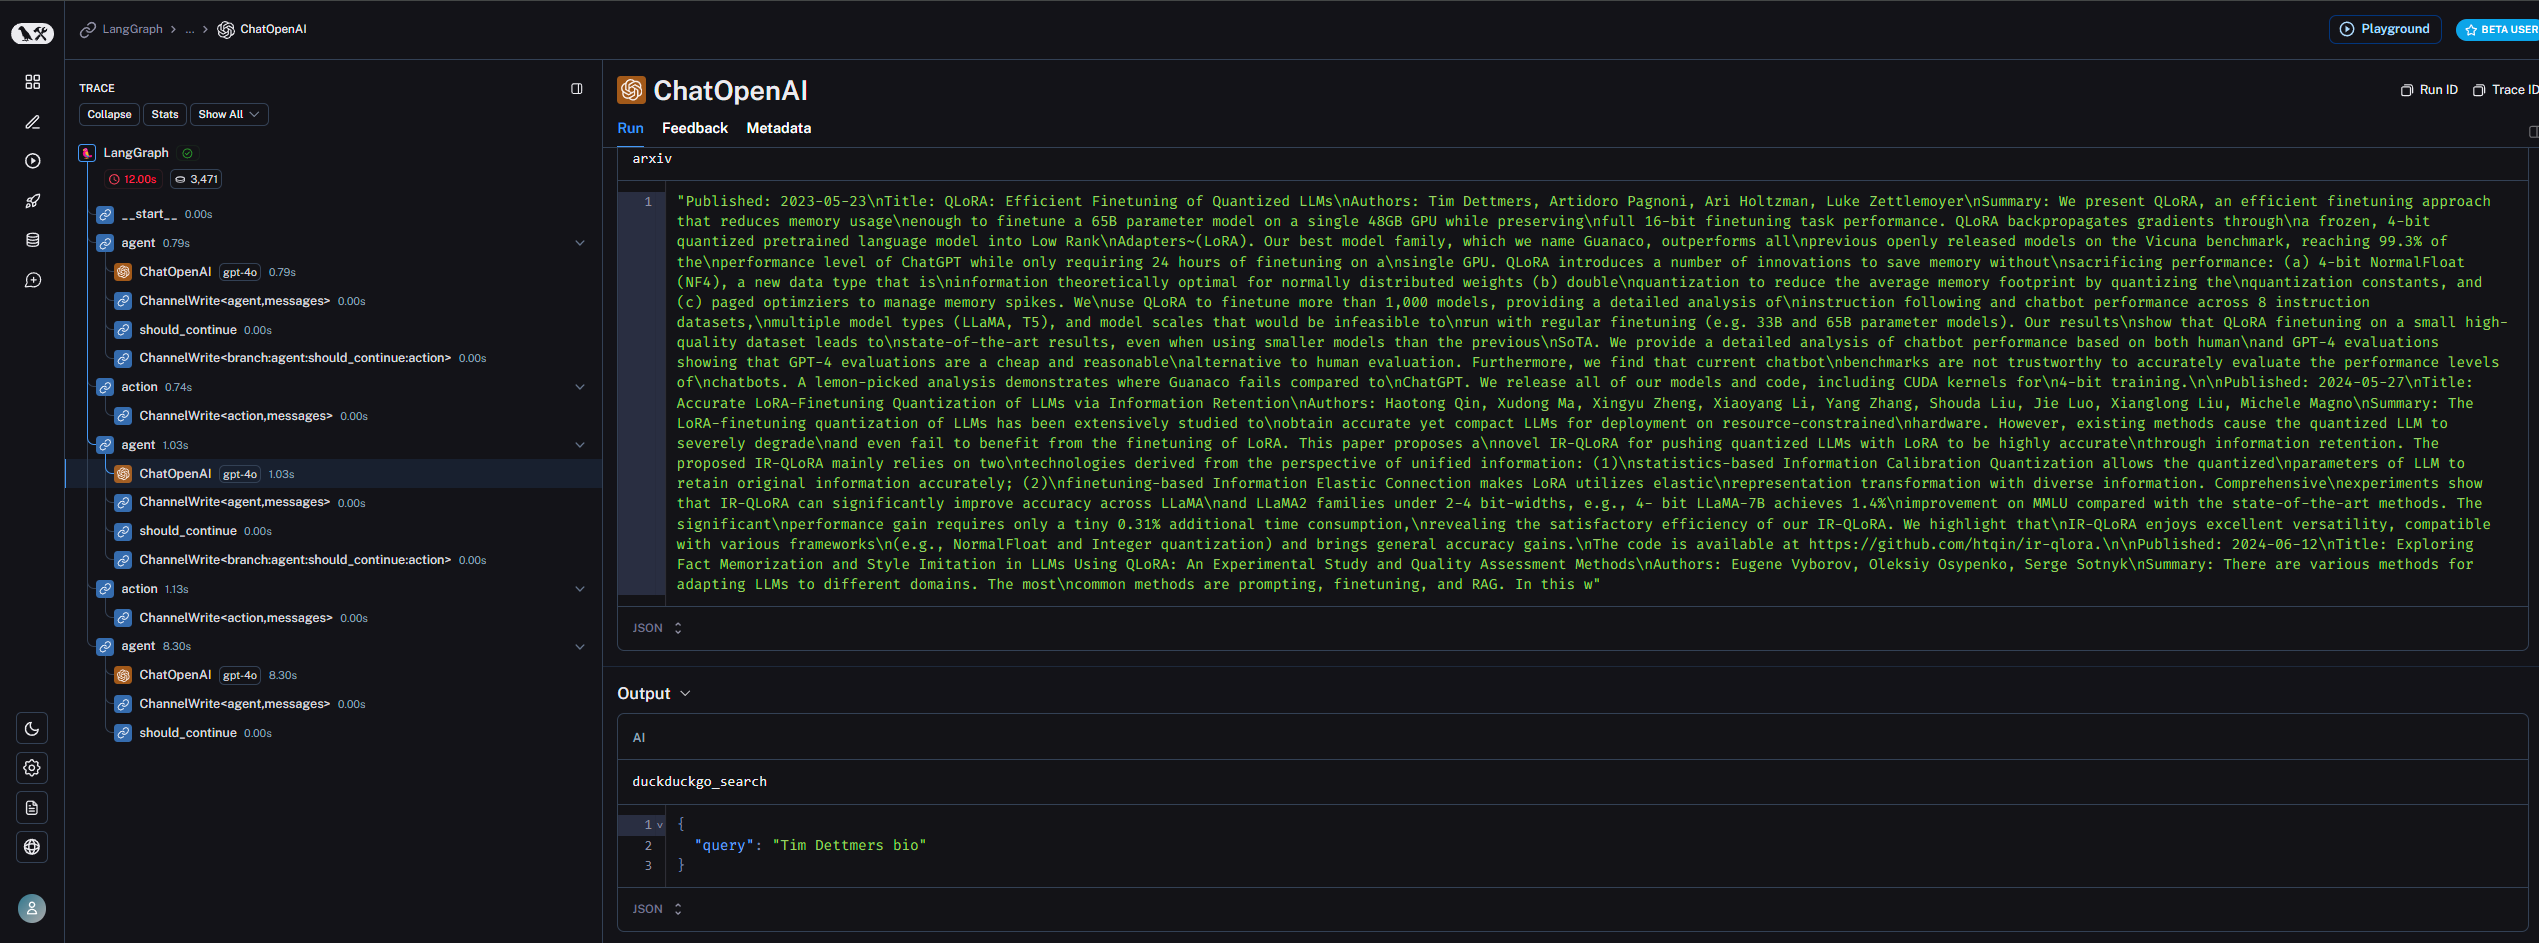
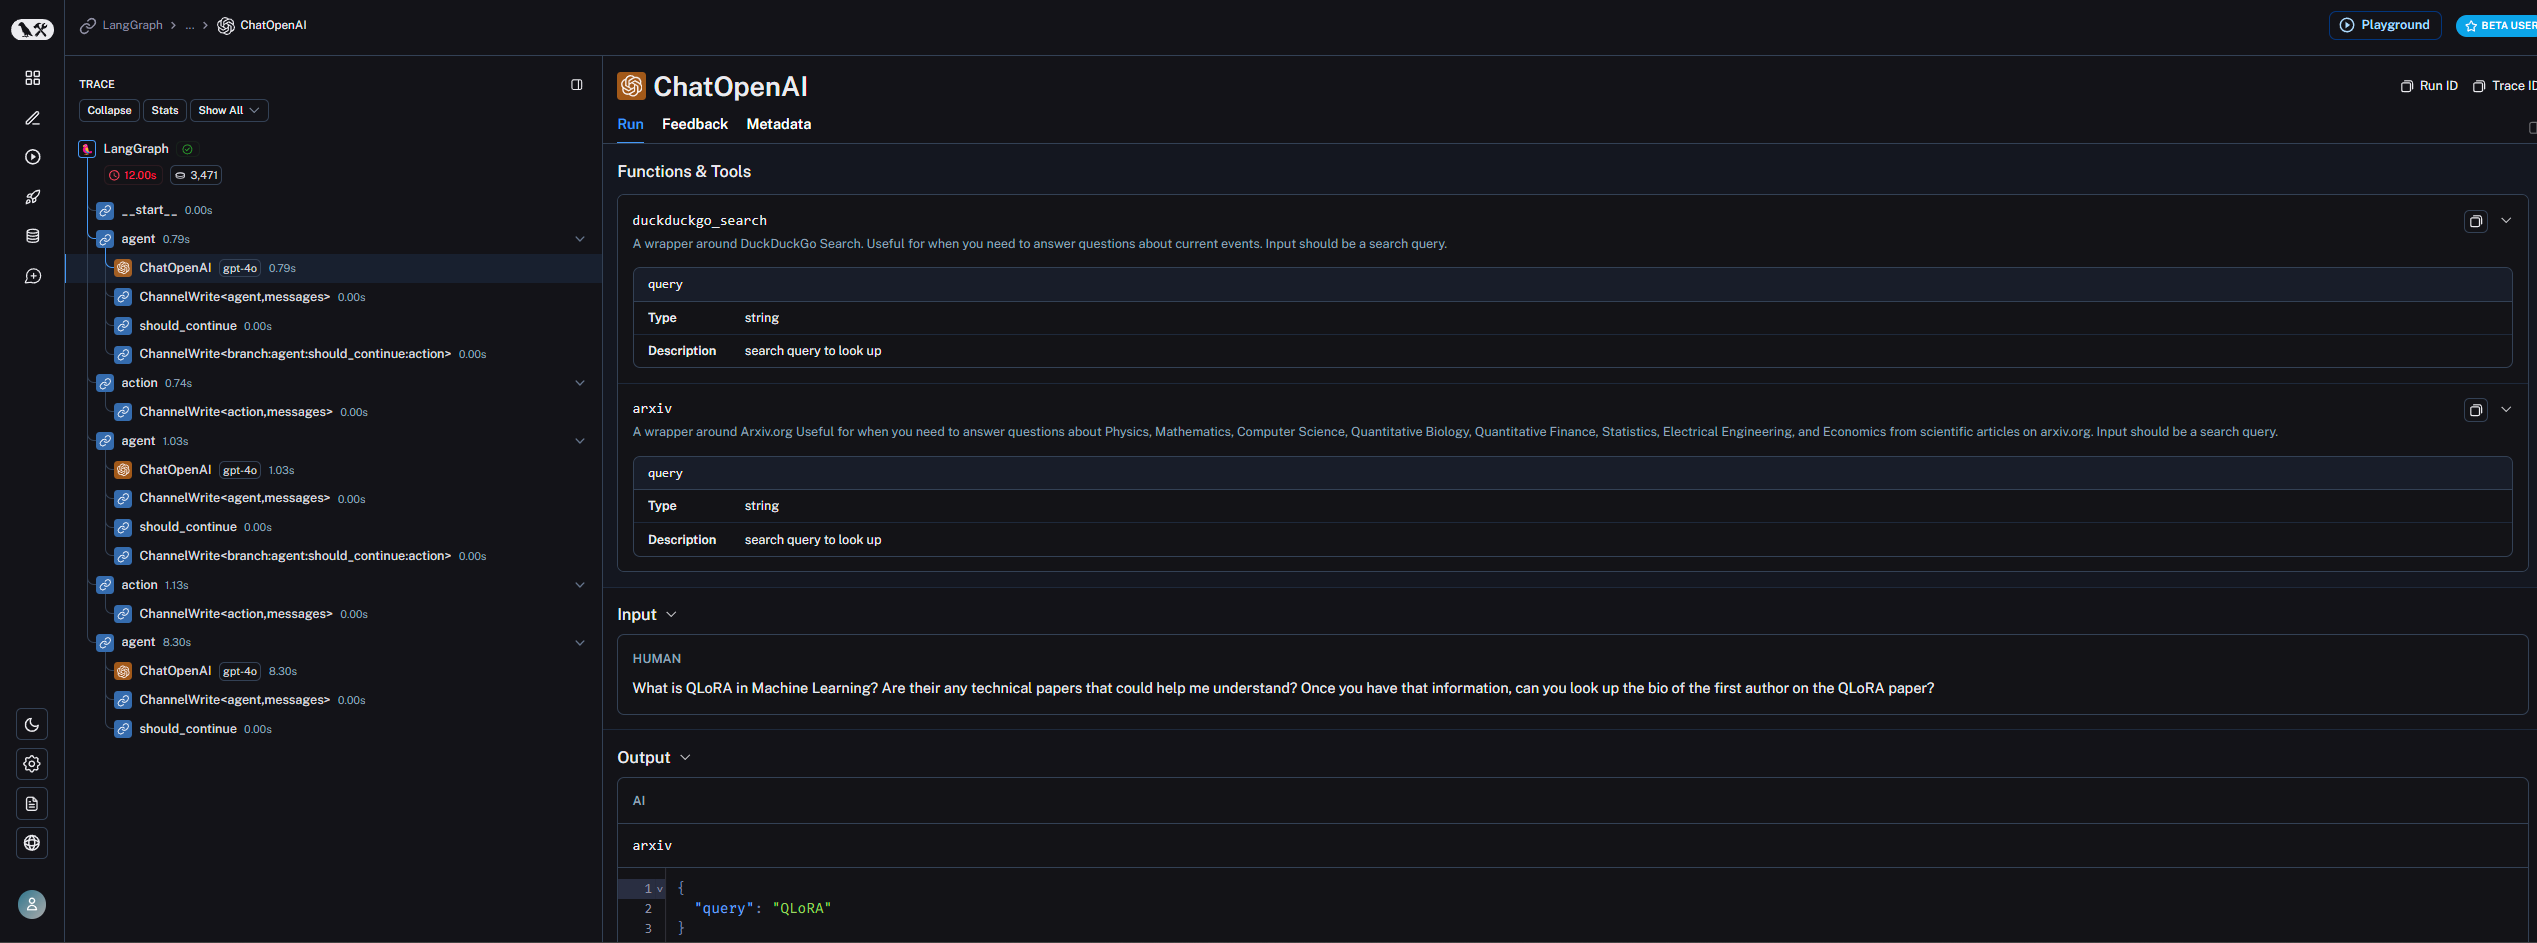
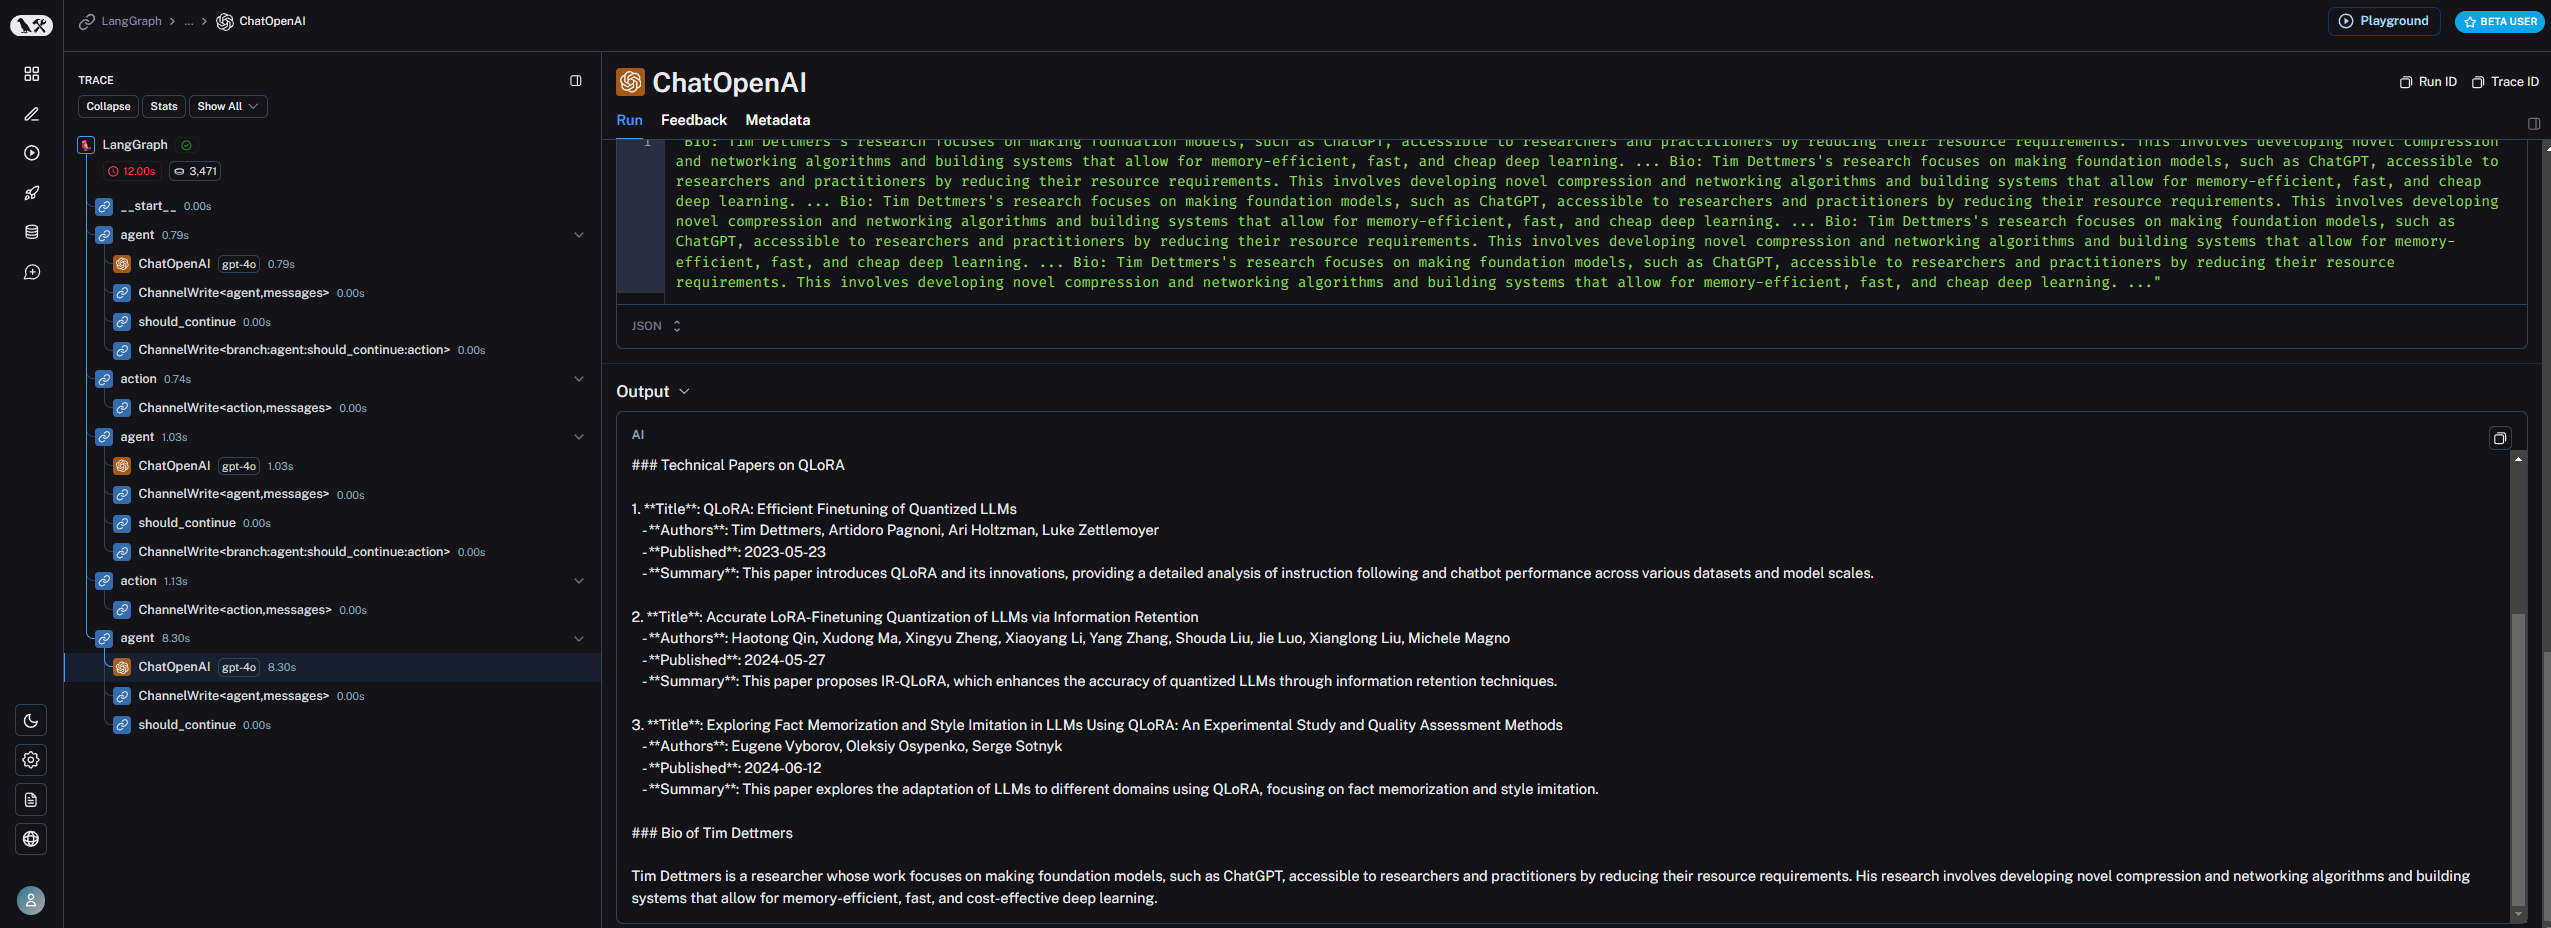
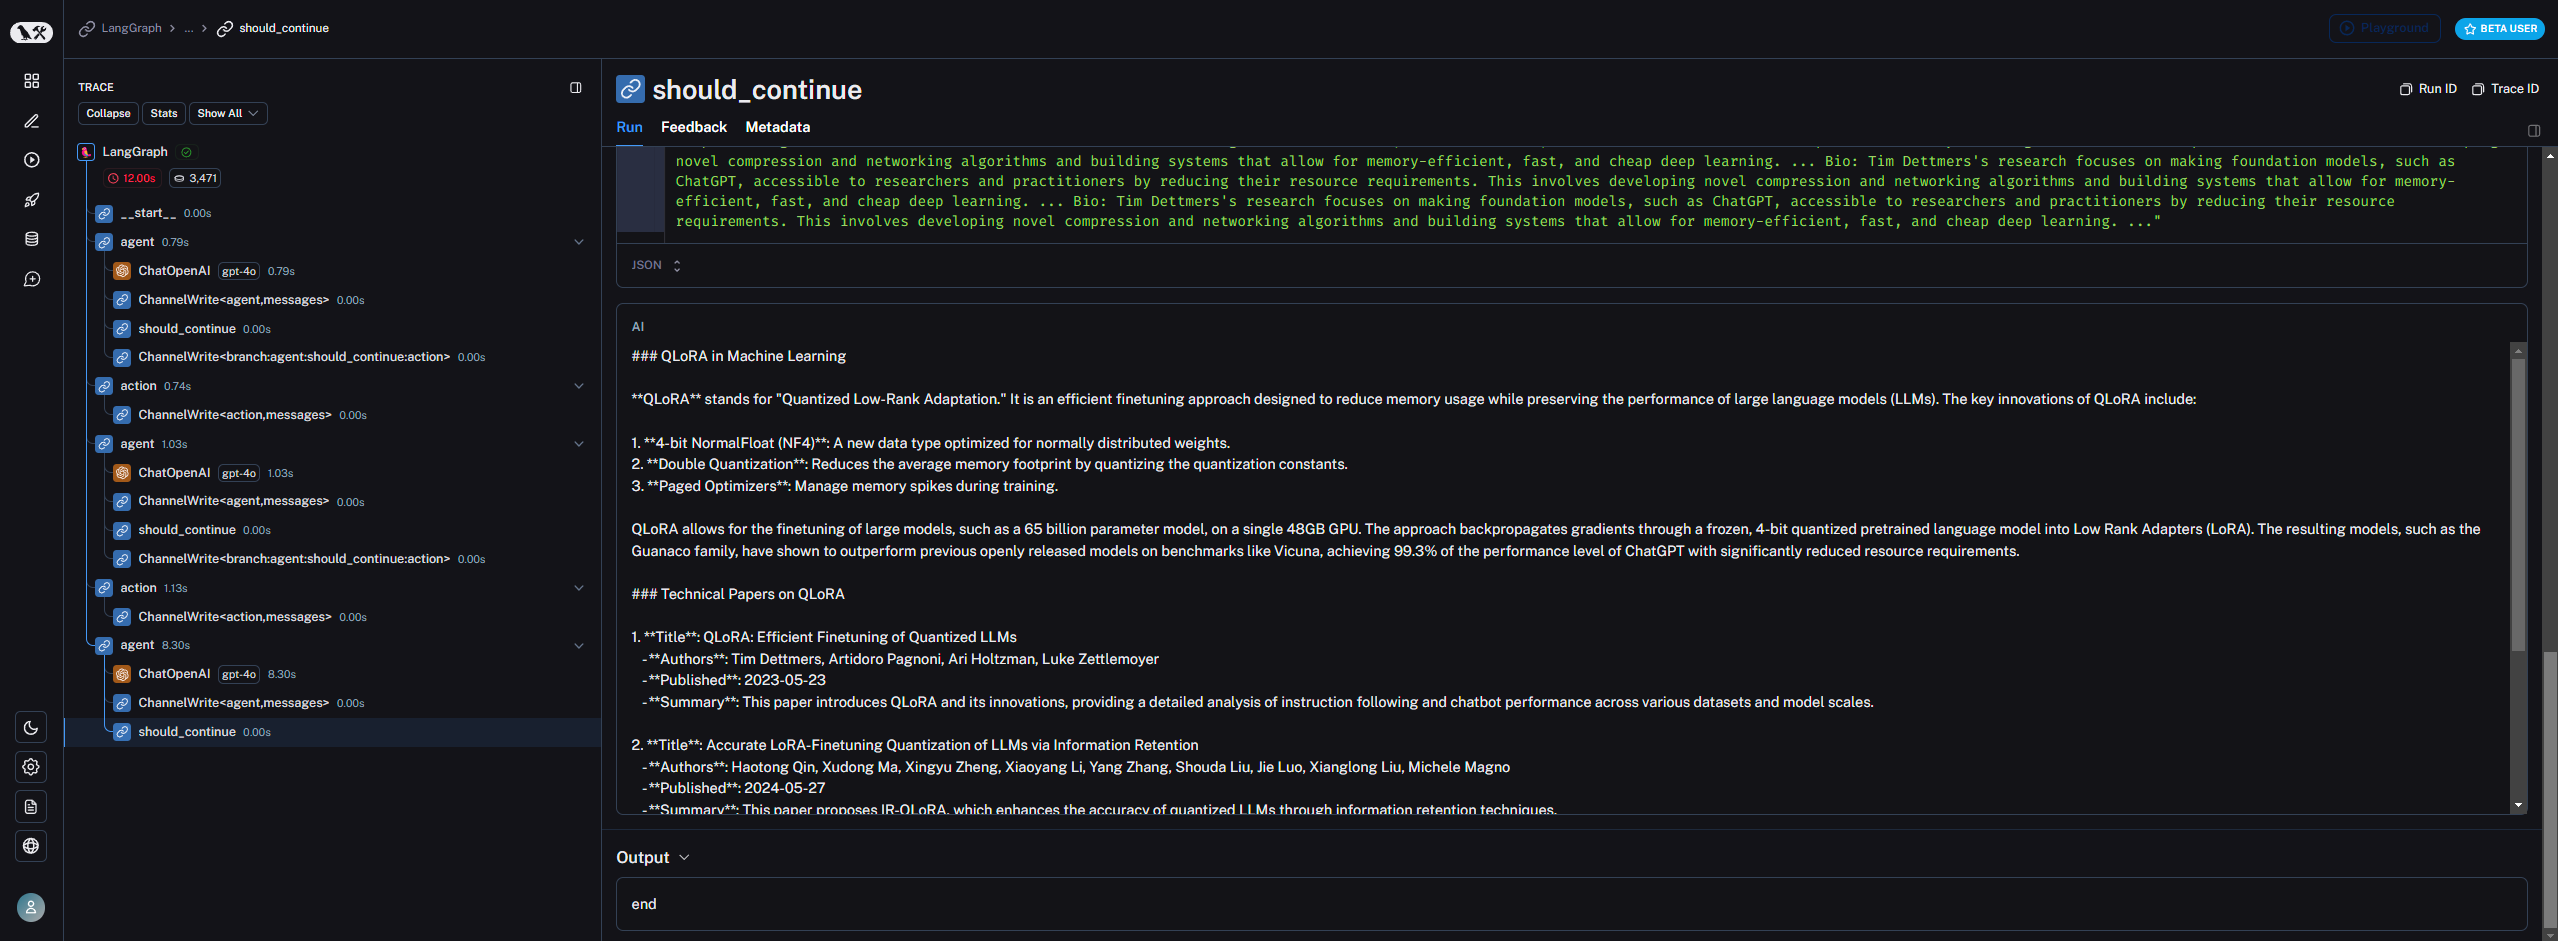

# 🤝 Breakout Room #2

## Part 1: LangSmith Evaluator

### Pre-processing for LangSmith

To do a little bit more preprocessing, let's wrap our LangGraph agent in a simple chain.

In [23]:
def convert_inputs(input_object):
  return {"messages" : [HumanMessage(content=input_object["question"])]}

def parse_output(input_state):
  return input_state["messages"][-1].content

agent_chain = convert_inputs | app | parse_output

In [24]:
agent_chain.invoke({"question" : "What is RAG?"})

"RAG stands for Retrieval-Augmented Generation. It is a technique used in natural language processing (NLP) and machine learning to improve the performance of language models by combining retrieval-based methods with generative models. Here's a brief overview of how it works:\n\n1. **Retrieval**: In the first step, the system retrieves relevant documents or pieces of information from a large corpus based on the input query. This is typically done using a retrieval model, such as BM25 or a dense retrieval model like DPR (Dense Passage Retrieval).\n\n2. **Augmentation**: The retrieved documents are then used to augment the input query. This means that the information from the retrieved documents is combined with the original query to provide more context and relevant information.\n\n3. **Generation**: Finally, a generative model, such as a transformer-based language model (e.g., GPT-3, BERT), uses the augmented input to generate a response. The generative model can produce more accurate 

### Task 1: Creating An Evaluation Dataset

Just as we saw last week, we'll want to create a dataset to test our Agent's ability to answer questions.

In order to do this - we'll want to provide some questions and some answers. Let's look at how we can create such a dataset below.

```python
questions = [
    "What optimizer is used in QLoRA?",
    "What data type was created in the QLoRA paper?",
    "What is a Retrieval Augmented Generation system?",
    "Who authored the QLoRA paper?",
    "What is the most popular deep learning framework?",
    "What significant improvements does the LoRA system make?"
]

answers = [
    {"must_mention" : ["paged", "optimizer"]},
    {"must_mention" : ["NF4", "NormalFloat"]},
    {"must_mention" : ["ground", "context"]},
    {"must_mention" : ["Tim", "Dettmers"]},
    {"must_mention" : ["PyTorch", "TensorFlow"]},
    {"must_mention" : ["reduce", "parameters"]},
]
```

#### 🏗️ Activity #3:

Please create a dataset in the above format with at least 5 questions.

In [25]:
questions = [
    "What optimizer is used in QLoRA?",
    "What data type was created in the QLoRA paper?",
    "What is a Retrieval Augmented Generation system?",
    "Who authored the QLoRA paper?",
    "What is the most popular deep learning framework?",
    "What significant improvements does the LoRA system make?"
]

answers = [
    {"must_mention" : ["paged", "optimizer"]},
    {"must_mention" : ["NF4", "NormalFloat"]},
    {"must_mention" : ["ground", "context"]},
    {"must_mention" : ["Tim", "Dettmers"]},
    {"must_mention" : ["PyTorch", "TensorFlow"]},
    {"must_mention" : ["reduce", "parameters"]},
]

Now we can add our dataset to our LangSmith project using the following code which we saw last Thursday!

In [26]:
from langsmith import Client

client = Client()
dataset_name = f"Retrieval Augmented Generation - Evaluation Dataset - {uuid4().hex[0:8]}"

dataset = client.create_dataset(
    dataset_name=dataset_name,
    description="Questions about the QLoRA Paper to Evaluate RAG over the same paper."
)

client.create_examples(
    inputs=[{"question" : q} for q in questions],
    outputs=answers,
    dataset_id=dataset.id,
)

#### ❓ Question #3:

How are the correct answers associated with the questions?

> NOTE: Feel free to indicate if this is problematic or not

##### ANSWER:  the questions and answers are associated by their position in two separate lists.

The association is implicit, based on the index. The first question corresponds to the first answer, the second question to the second answer, and so on.
This method is problematic for several reasons:

1. It's error-prone: If the lists get out of sync (e.g., a question is added without a corresponding answer), it could lead to incorrect evaluations.
2. It's not self-documenting: Someone reading the code later might not immediately understand how questions and answers are related.
3. It's inflexible: Adding or removing questions/answers in the middle of the lists could disrupt all subsequent associations.

A more robust approach would be to use a dictionary or a list of tuples to explicitly pair questions with their corresponding answers.

NOTE:  a LangSmith dataset has been created with the questions and answers about the QLoRA paper.  This at least provides a means of validation

- https://smith.langchain.com/public/fb3e23b9-31c5-49e0-9b88-3f771a75fa36/d

### Task 2: Adding Evaluators

Now we can add a custom evaluator to see if our responses contain the expected information.

We'll be using a fairly naive exact-match process to determine if our response contains specific strings.

In [27]:
from langsmith.evaluation import EvaluationResult, run_evaluator

@run_evaluator
def must_mention(run, example) -> EvaluationResult:
    prediction = run.outputs.get("output") or ""
    required = example.outputs.get("must_mention") or []
    score = all(phrase in prediction for phrase in required)
    return EvaluationResult(key="must_mention", score=score)

#### ❓ Question #4:

What are some ways you could improve this metric as-is?

> NOTE: Alternatively you can suggest where gaps exist in this method.

##### ANSWER:  

The current metric is a simple "must mention" check, some ways to improve this metric or address its gaps include:

- Case sensitivity: The current implementation is case-sensitive. You could make it case-insensitive for more flexible matching.
- Partial matching: It currently checks for exact substrings. You could implement fuzzy matching or stemming to account for variations in word forms.
- Contextual understanding: The current method doesn't consider the context in which words appear. You could implement a more sophisticated NLP approach to ensure the required phrases are used in the correct context.
- Weighting: All required phrases are treated equally. You could implement a weighting system where some phrases are more important than others.
- Negation handling: The current method doesn't account for negations. A response containing "not NF4" would still be considered correct if "NF4" is a required phrase.
- Synonyms: It doesn't recognize synonyms or paraphrases. You could implement a synonym recognition system.
- Scoring granularity: The current scoring is binary (all or nothing). You could implement a more granular scoring system, perhaps giving partial credit for mentioning some but not all required phrases.


reference:  https://docs.smith.langchain.com/how_to_guides/evaluation/evaluate_llm_application

Now that we have created our custom evaluator - let's initialize our `RunEvalConfig` with it, and a few others:

- `"criteria"` includes the default criteria which, in this case, means "helpfulness"
- `"cot_qa"` includes a criteria that bases whether or not the answer is correct by utilizing a Chain of Thought prompt and the provided context to determine if the response is correct or not.

In [58]:
from langchain.smith import RunEvalConfig, run_on_dataset

eval_config = RunEvalConfig(
    custom_evaluators=[must_mention],
    evaluators=[
        "criteria",
        "cot_qa",
    ],
)

Task 3: Evaluating

All that is left to do is evaluate our agent's response!

In [29]:
client.run_on_dataset(
    dataset_name=dataset_name,
    llm_or_chain_factory=agent_chain,
    evaluation=eval_config,
    verbose=True,
    project_name=f"RAG Pipeline - Evaluation - {uuid4().hex[0:8]}",
    project_metadata={"version": "1.0.0"},
)

View the evaluation results for project 'RAG Pipeline - Evaluation - fcc59b0c' at:
https://smith.langchain.com/o/a7c25b04-2d2b-5cac-90ab-f8d1cb327556/datasets/84470f1d-1a4d-4e94-b97d-d2f16cb9c43a/compare?selectedSessions=a7681832-e5be-471d-b523-f2fb84bfdf17

View all tests for Dataset Retrieval Augmented Generation - Evaluation Dataset - d2ba2462 at:
https://smith.langchain.com/o/a7c25b04-2d2b-5cac-90ab-f8d1cb327556/datasets/84470f1d-1a4d-4e94-b97d-d2f16cb9c43a
[------------------------------------------------->] 6/6

{'project_name': 'RAG Pipeline - Evaluation - fcc59b0c',
 'results': {'5d3fec3a-d272-4884-8d0b-52d8f1e7c591': {'input': {'question': 'What optimizer is used in QLoRA?'},
   'feedback': [EvaluationResult(key='helpfulness', score=1, value='Y', comment='The criterion for this task is "helpfulness". \n\nThe submission provides a direct answer to the question, stating that the AdamW optimizer is used in QLoRA. \n\nIn addition to answering the question, the submission also provides additional information about the AdamW optimizer, explaining that it is a variant of the Adam optimizer that includes weight decay. This information is insightful as it provides context about why this particular optimizer might be used in QLoRA.\n\nThe submission also mentions that the AdamW optimizer is well-suited for training large-scale language models and is commonly used in various fine-tuning tasks. This information is appropriate as it relates to the use of the optimizer in QLoRA, a method used for trainin

## Part 2: LangGraph with Helpfulness:

### Task 3: Adding Helpfulness Check and "Loop" Limits

Now that we've done evaluation - let's see if we can add an extra step where we review the content we've generated to confirm if it fully answers the user's query!

We're going to make a few key adjustments to account for this:

1. We're going to add an artificial limit on how many "loops" the agent can go through - this will help us to avoid the potential situation where we never exit the loop.
2. We'll add a custom node and conditional edge to determine if the response was helpful enough.

First, let's define our state again - we can check the length of the state object, so we don't need additional state for this.

In [30]:
class AgentState(TypedDict):
  messages: Annotated[list, add_messages]

We're going to add a custom helpfulness check here!

In [32]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

def check_helpfulness(state):
  initial_query = state["messages"][0]
  final_response = state["messages"][-1]

  if len(state["messages"]) > 10:
    return "END"

  prompt_template = """\
  Given an initial query and a final response, determine if the final response is extremely helpful or not. Please indicate helpfulness with a 'Y' and unhelpfulness as an 'N'.

  Initial Query:
  {initial_query}

  Final Response:
  {final_response}"""

  prompt_template = PromptTemplate.from_template(prompt_template)

  helpfulness_check_model = ChatOpenAI(model="gpt-4o")

  helpfulness_chain = prompt_template | helpfulness_check_model | StrOutputParser()

  helpfulness_response = helpfulness_chain.invoke({"initial_query" : initial_query.content, "final_response" : final_response.content})

  if "Y" in helpfulness_response:
    print("Helpful!")
    return "end"
  else:
    print("Not helpful!")
    return "continue"

def dummy_node(state):
  return

#### 🏗️ Activity #4:

Please write what is happening in our `check_helpfulness` function!

Now we can set our graph up! This process will be almost entirely the same - with the inclusion of one additional node/conditional edge!

#### 🏗️ Activity #5:

Please write markdown for the following cells to explain what each is doing.

##### add nodes to the graph

In [33]:
graph_with_helpfulness_check = StateGraph(AgentState)

graph_with_helpfulness_check.add_node("agent", call_model)
graph_with_helpfulness_check.add_node("action", call_tool)
graph_with_helpfulness_check.add_node("passthrough", dummy_node)

##### set entry point for the graph

In [34]:
graph_with_helpfulness_check.set_entry_point("agent")

##### add conditional edges to the graph that define conditions for state transtions between nodes

In [35]:
graph_with_helpfulness_check.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue" : "action",
        "end" : "passthrough"
    }
)

graph_with_helpfulness_check.add_conditional_edges(
    "passthrough",
    check_helpfulness,
    {
        "continue" : "agent",
        "end" : END
    }
)

##### add edge between action and agent nodes

In [36]:
graph_with_helpfulness_check.add_edge("action", "agent")

##### make the graph executable.  Let's go!

In [37]:
agent_with_helpfulness_check = graph_with_helpfulness_check.compile()

In [47]:
agent_with_helpfulness_check.get_graph().print_ascii()

         +-----------+              
         | __start__ |              
         +-----------+              
                *                   
                *                   
                *                   
           +-------+                
           | agent |                
           +-------+.               
          ..         ..             
        ..             ..           
       .                 .          
+--------+         +-------------+  
| action |         | passthrough |  
+--------+         +-------------+  
                          .         
                          .         
                          .         
                     +---------+    
                     | __end__ |    
                     +---------+    


##### Run the LangGraph graph given a sample human message -- and print out the messages...

In [38]:
inputs = {"messages" : [HumanMessage(content="Related to machine learning, what is LoRA? Also, who is Tim Dettmers? Also, what is Attention?")]}

messages = agent_with_helpfulness_check.invoke(inputs)

print_messages(messages)

Helpful!
Initial Query: Related to machine learning, what is LoRA? Also, who is Tim Dettmers? Also, what is Attention?


Agent Response: Let's break down each of these terms and individuals:

### LoRA (Low-Rank Adaptation)
LoRA, or Low-Rank Adaptation, is a technique used in machine learning to adapt pre-trained models to new tasks with minimal computational resources. The idea is to decompose the weight matrices of neural networks into low-rank matrices, which can be fine-tuned more efficiently. This approach is particularly useful in scenarios where computational resources are limited, as it reduces the number of parameters that need to be updated during training.

### Tim Dettmers
Tim Dettmers is a researcher known for his work in the field of machine learning, particularly in the areas of efficient training and inference of large-scale neural networks. He has contributed to the development of techniques that make it feasible to train large models on consumer-grade hardware. His res

### Task 4: LangGraph for the "Patterns" of GenAI

Let's ask our system about the 4 patterns of Generative AI:

1. Prompt Engineering
2. RAG
3. Fine-tuning
4. Agents

In [41]:
patterns = ["prompt engineering", "RAG", "fine-tuning", "LLM-based agents", "what is string?"]

In [42]:
for pattern in patterns:
  what_is_string = f"What is {pattern} and when did it break onto the scene??"
  inputs = {"messages" : [HumanMessage(content=what_is_string)]}
  messages = agent_with_helpfulness_check.invoke(inputs)
  print_messages(messages)
  print("\n\n")

Helpful!
Initial Query: What is prompt engineering and when did it break onto the scene??


Agent Response: Prompt engineering is a technique used primarily in the field of artificial intelligence (AI) and natural language processing (NLP). It involves crafting specific inputs (prompts) to guide the behavior and output of AI models, particularly large language models like GPT-3, GPT-4, and others. The goal is to elicit desired responses from the model by carefully designing the input text.

### Key Aspects of Prompt Engineering:
1. **Input Design**: Creating prompts that are clear, specific, and tailored to the task at hand.
2. **Iterative Refinement**: Continuously refining prompts based on the model's responses to improve accuracy and relevance.
3. **Contextual Awareness**: Ensuring that the prompt provides enough context for the model to understand the task.
4. **Task-Specific Prompts**: Designing prompts that are specific to the task, whether it's text generation, question answerin